# DBSCAN

In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_

    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)

        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)

        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'

    plt.legend(loc=legend_loc)
    plt.show()

In [3]:
iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(data = iris.data, columns = feature_names)
irisDF['target'] = iris.target

dbscan = DBSCAN(eps = 0.6, min_samples = 8, metric = 'euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


### DBSCAN 적용하기 - make_circles() 데이터 세트

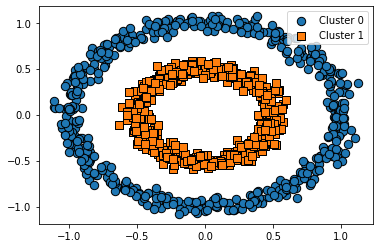

In [4]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples = 1000, shuffle = True, noise = 0.05, random_state = 0, factor = 0.5)
clusterDF = pd.DataFrame(data = X, columns = ['ftr1', 'ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter = False)

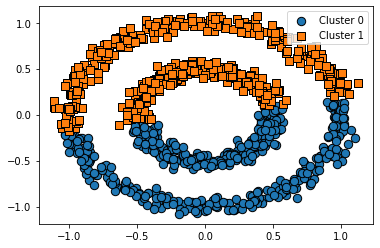

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, max_iter = 1000, random_state = 0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter = False)

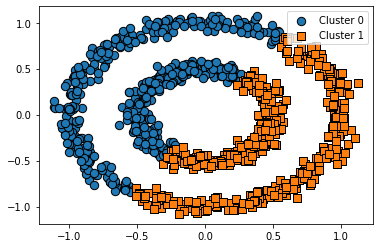

In [6]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = 2, max_iter = 1000, random_state = 0)
gmm_labels = gmm.fit_predict(X)
clusterDF['gmm_cluster'] = gmm_labels

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter = False)

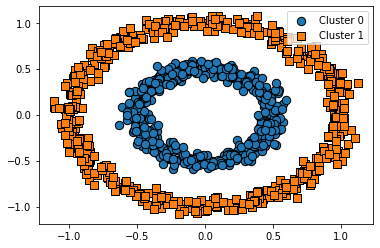

In [7]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.2, min_samples = 10, metric = 'euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels
visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter = False)